In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from pl_bolts.models.regression import LogisticRegression
from pprint import pprint
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, f1_score
import torch
sys.path.insert(1, "C:/CS-GO-Grenade-Classification/project/utils")
sys.path.insert(1, "C:/CS-GO-Grenade-Classification/project/")
from data_utils import preprocess

In [2]:
CHECKPOINT_PATH = "C:/CS-GO-Grenade-Classification/project/lightning_logs/version_34/checkpoints/epoch=0-step=32.ckpt"
labels = ["FALSE", "TRUE"]
clf = pickle.load(open("saved_model.sav", "rb"))
model = LogisticRegression.load_from_checkpoint(CHECKPOINT_PATH)

In [3]:
def load_data():
    mirage_csv_file = "C:/CS-GO-Grenade-Classification/project/data/train-grenades-de_mirage.csv"
    inferno_csv_file = "C:/CS-GO-Grenade-Classification/project/data/train-grenades-de_inferno.csv"
    inferno = pd.read_csv(mirage_csv_file, index_col = 0)
    mirage = pd.read_csv(inferno_csv_file, index_col = 0)

    raw_data = pd.concat([inferno, mirage])
    X, y = preprocess(raw_data)
    return (X, y)

def get_metrics(y_true, y_pred):
    metrics = {}
    metrics["acc"] = accuracy_score(y_true, y_pred)
    metrics["balanced_acc"] = balanced_accuracy_score(y_true, y_pred)
    metrics["f1"] = f1_score(y_true, y_pred)
    return metrics

In [4]:
_, X_test, _, y_test = train_test_split(*load_data(), random_state = 42 )

In [5]:
y_pred = clf.predict(X_test)

In [6]:
metrics = get_metrics(y_test, y_pred)
pprint(metrics)

{'acc': 0.9281767955801105,
 'balanced_acc': 0.888860802157061,
 'f1': 0.9534050179211468}


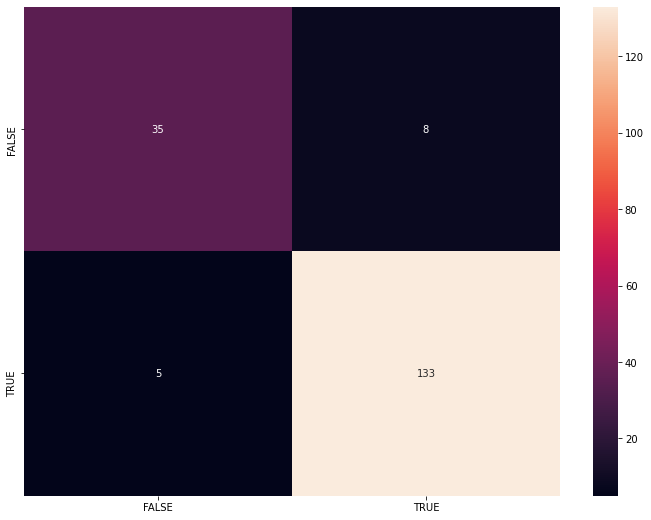

In [7]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(cm, ax = ax, annot = True, fmt = "d", xticklabels = labels, yticklabels = labels);

In [12]:
X_test_pl = X_test.values.astype(np.float32)
X_test_pl = torch.from_numpy(X_test_pl)
preds = model(X_test_pl)
y_pred = preds.detach().numpy()
y_pred = y_pred[:, 0] > y_pred[:,1]
y_pred = y_pred.astype(int)

In [13]:
metrics = get_metrics(y_test, y_pred)
pprint(metrics)

{'acc': 0.39779005524861877,
 'balanced_acc': 0.5090158409167509,
 'f1': 0.4293193717277487}


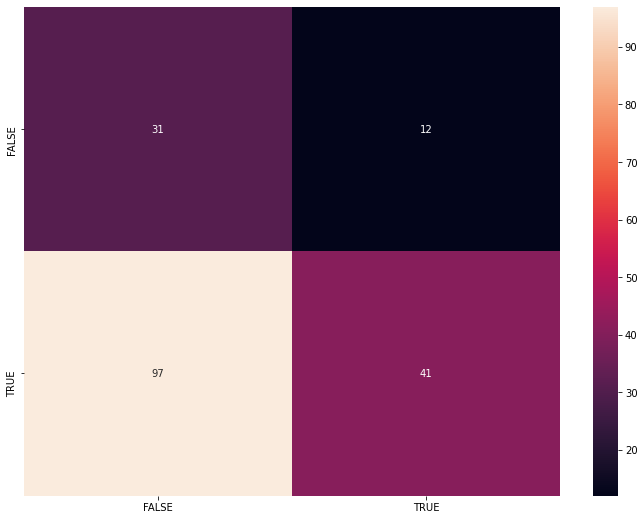

In [14]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(cm, ax = ax, annot = True, fmt = "d", xticklabels = labels, yticklabels = labels);